In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 📥 بارگذاری فایل اکسل
file_path = 'divar_real_estate(3)1.xlsx'  # یا مسیر فایل خودتان
df = pd.read_excel(file_path, sheet_name='divar_real_estate')

# ✅ بررسی داده‌های گمشده و تکراری
print("🔍 Missing values:\n", df.isnull().sum())
print("🔁 Duplicate rows:", df.duplicated().sum())

# ✅ تبدیل ستون‌های 'دارد' / 'ندارد' به عددی
bool_map = {'دارد': 1, 'ندارد': 0}
df['elevator'] = df['elevator'].map(bool_map)
df['parking'] = df['parking'].map(bool_map)
df['warehouse'] = df['warehouse'].map(bool_map)

# ✅ تبدیل قیمت به تومان و محاسبه قیمت هر متر مربع
df['price_toman'] = df['price'] / 10
df['price_per_sqm'] = df['price_toman'] / df['area']

# ✅ کددهی محله‌ها (Label Encoding)
le = LabelEncoder()
df['district_code'] = le.fit_transform(df['address'])

# ✅ ذخیره نسخه جدید داده‌ها در فایل اکسل جدید
df.to_excel('cleaned_divar_real_estate.xlsx', index=False)
print("✅ فایل تمیزسازی‌شده با نام 'cleaned_divar_real_estate.xlsx' ذخیره شد.")


🔍 Missing values:
 token         0
address       0
price         0
floor         0
area          0
year_built    0
rooms         0
elevator      0
parking       0
warehouse     0
dtype: int64
🔁 Duplicate rows: 0
✅ فایل تمیزسازی‌شده با نام 'cleaned_divar_real_estate.xlsx' ذخیره شد.
✅ فایل تمیزسازی‌شده با نام 'cleaned_divar_real_estate.xlsx' ذخیره شد.


In [12]:
import pandas as pd

# بارگذاری فایل قبلی
df = pd.read_excel("cleaned_divar_real_estate_featured.xlsx")

# حذف ستون‌های اضافی
df.drop(columns=["token", "price_toman"], inplace=True)

# ذخیره فایل جدید
df.to_excel("cleaned_divar_real_estate_no_token.xlsx", index=False)

print("✅ فایل جدید با موفقیت ذخیره شد.")


✅ فایل جدید با موفقیت ذخیره شد.


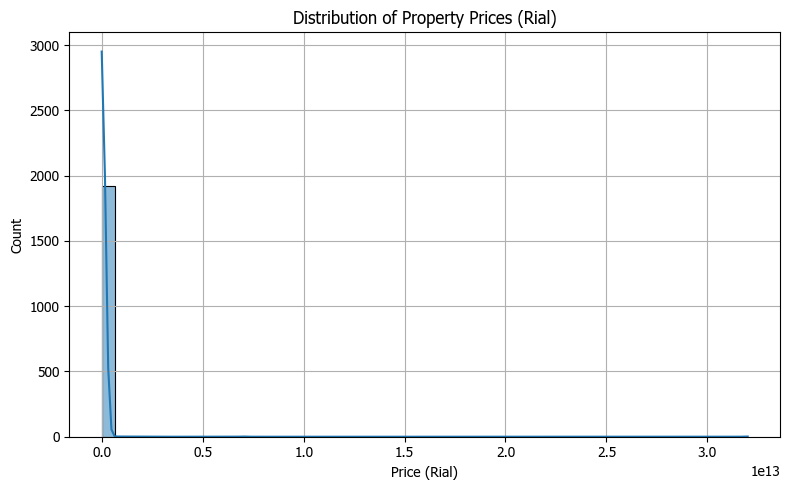

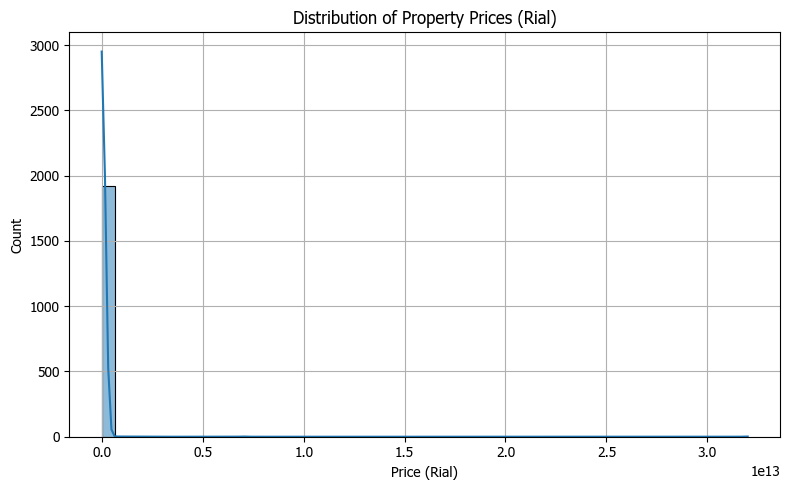

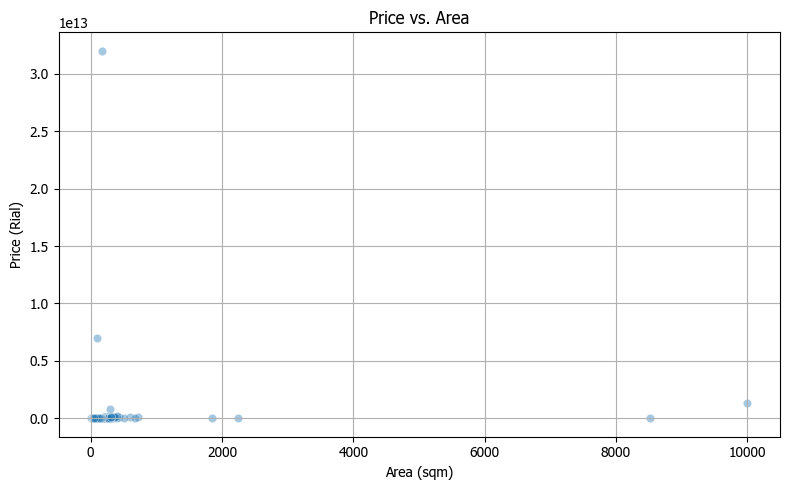

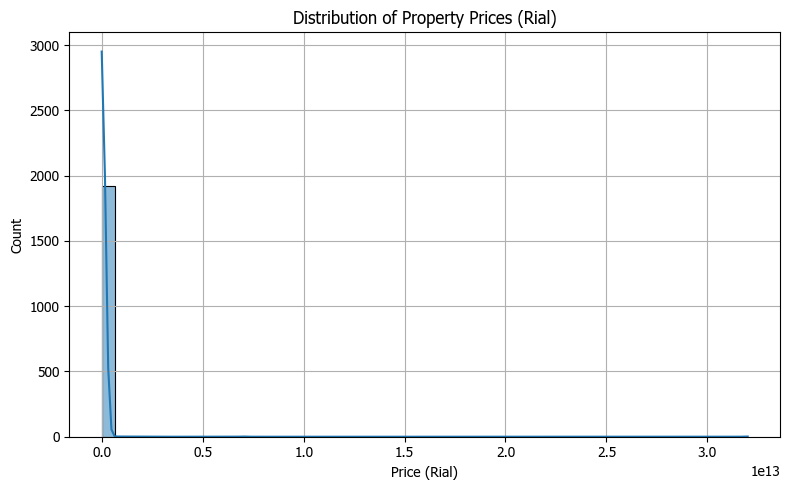

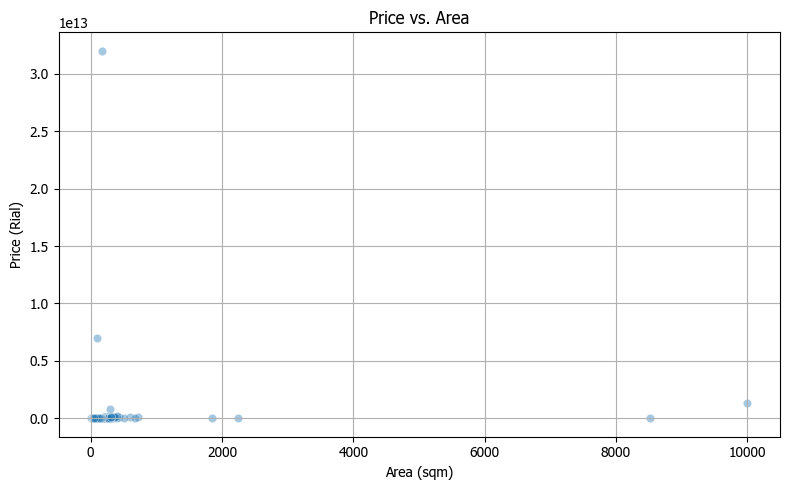

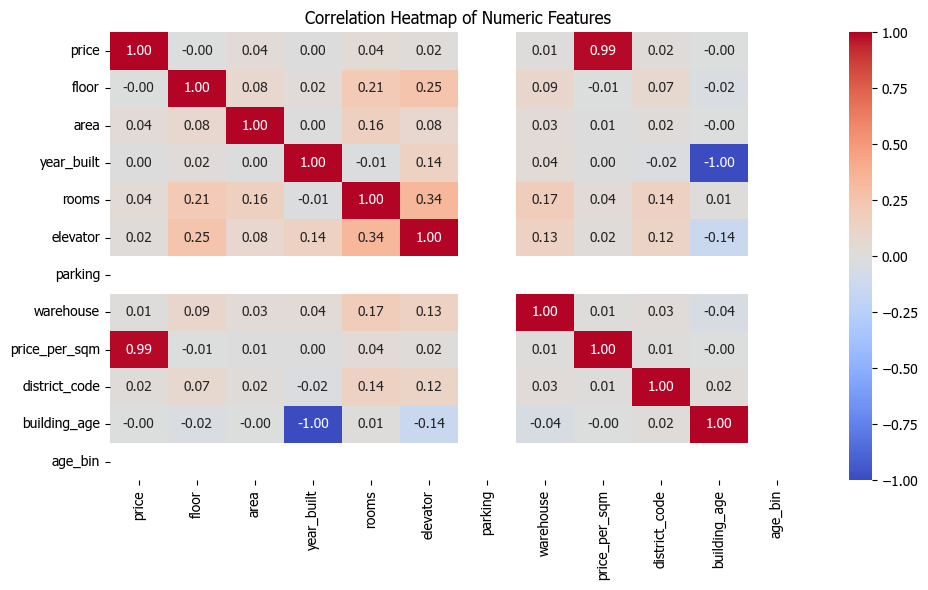

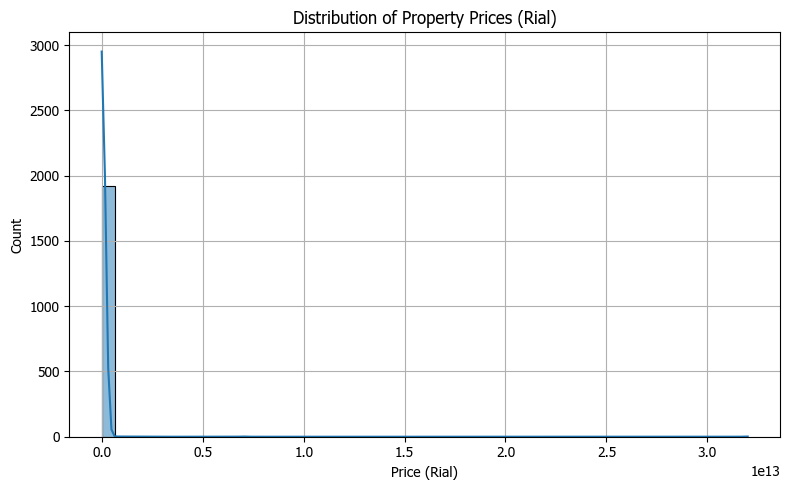

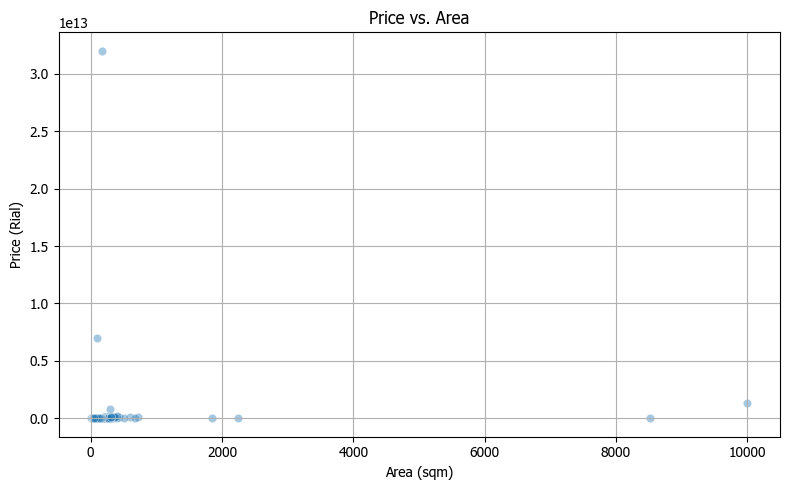

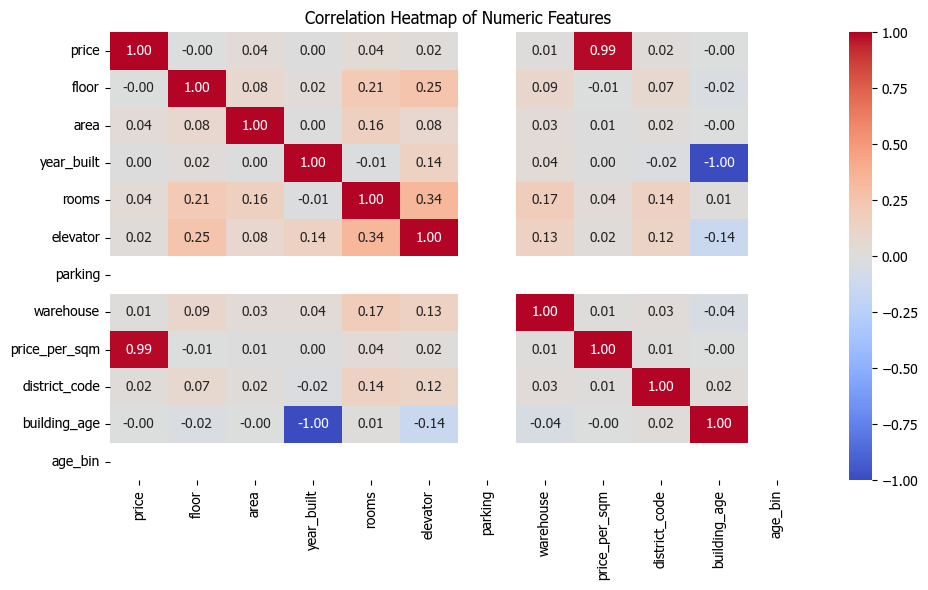

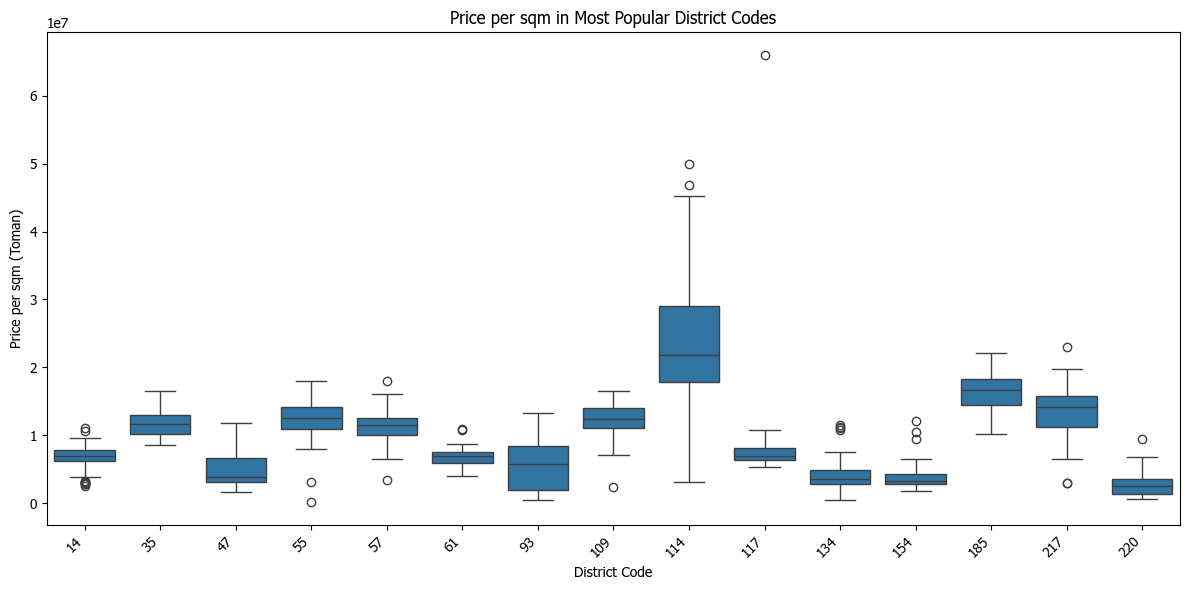

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Load cleaned data
df = pd.read_excel("cleaned_divar_real_estate_no_token.xlsx")

# 🎯 Set Persian font in matplotlib (if needed)
plt.rcParams['font.family'] = 'Tahoma'  # or 'Arial' if Persian is problematic

# 1️⃣ Price Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Property Prices (Rial)")
plt.xlabel("Price (Rial)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2️⃣ Price vs. Area Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='area', y='price', data=df, alpha=0.4)
plt.title("Price vs. Area")
plt.xlabel("Area (sqm)")
plt.ylabel("Price (Rial)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3️⃣ Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

# 4️⃣ Neighborhood Effect on Price per sqm (by district code)
plt.figure(figsize=(12, 6))
top_districts = df['district_code'].value_counts().head(15).index
sns.boxplot(data=df[df['district_code'].isin(top_districts)], x='district_code', y='price_per_sqm')
plt.xticks(rotation=45, ha='right')
plt.title("Price per sqm in Most Popular District Codes")
plt.xlabel("District Code")
plt.ylabel("Price per sqm (Toman)")
plt.tight_layout()
plt.show()


In [15]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 📥 بارگذاری فایل اکسل
file_path = 'divar_real_estate(3)1.xlsx'  # یا مسیر فایل خودتان
df = pd.read_excel(file_path, sheet_name='divar_real_estate')

# ✅ بررسی داده‌های گمشده و تکراری
print("🔍 Missing values:\n", df.isnull().sum())
print("🔁 Duplicate rows:", df.duplicated().sum())

# ✅ تبدیل ستون‌های 'دارد' / 'ندارد' به عددی
bool_map = {'دارد': 1, 'ندارد': 0}
df['elevator'] = df['elevator'].map(bool_map)
df['parking'] = df['parking'].map(bool_map)
df['warehouse'] = df['warehouse'].map(bool_map)

# ✅ کددهی محله‌ها (Label Encoding)
le = LabelEncoder()
df['district_code'] = le.fit_transform(df['address'])

# ✅ محاسبه مجدد قیمت هر متر مربع بر اساس price
df['price_per_sqm'] = df['price'] / df['area']

# ✅ محاسبه سن بنا با فرض سال 1404
if 'year_built' in df.columns:
    df['building_age'] = 1404 - df['year_built']

# ✅ مهندسی ویژگی سطح منطقه
def area_level(price_per_sqm):
    if price_per_sqm >= df['price_per_sqm'].quantile(0.75):
        return 'Luxury'
    elif price_per_sqm <= df['price_per_sqm'].quantile(0.25):
        return 'Low'
    else:
        return 'Medium'
df['area_level'] = df['price_per_sqm'].apply(area_level)

# ✅ دسته‌بندی متراژ
area_bins = [0, 50, 100, 150, 200, df['area'].max()]
area_labels = ['<50', '50-100', '100-150', '150-200', '200+']
df['area_bin'] = pd.cut(df['area'], bins=area_bins, labels=area_labels, include_lowest=True)

# ✅ حذف ستون‌های اضافی
drop_cols = [col for col in ['token', 'price_toman', 'age_bin'] if col in df.columns]
df.drop(columns=drop_cols, inplace=True)

# ✅ ذخیره نسخه جدید داده‌ها در فایل اکسل جدید
df.to_excel('cleaned_divar_real_estate_featured.xlsx', index=False)
print("✅ فایل تمیزسازی‌شده با نام 'cleaned_divar_real_estate_featured.xlsx' ذخیره شد.")

🔍 Missing values:
 token         0
address       0
price         0
floor         0
area          0
year_built    0
rooms         0
elevator      0
parking       0
warehouse     0
dtype: int64
🔁 Duplicate rows: 0
✅ فایل تمیزسازی‌شده با نام 'cleaned_divar_real_estate_featured.xlsx' ذخیره شد.
✅ فایل تمیزسازی‌شده با نام 'cleaned_divar_real_estate_featured.xlsx' ذخیره شد.


In [2]:
import pandas as pd
df = pd.read_excel("cleaned_divar_real_estate_featured.xlsx")
# ویژگی ترکیبی: متراژ ضربدر تعداد اتاق
if 'area' in df.columns and 'rooms' in df.columns:
    df['area_x_rooms'] = df['area'] * df['rooms']

# ویژگی ترکیبی: وجود آسانسور در طبقات بالا (مثلاً طبقه بالاتر از 3)
if 'floor' in df.columns and 'elevator' in df.columns:
    df['elevator_high_floor'] = ((df['floor'] > 3) & (df['elevator'] == 1)).astype(int)

# بررسی داده‌های پرت در price_per_sqm
if 'price_per_sqm' in df.columns:
    q1 = df['price_per_sqm'].quantile(0.25)
    q3 = df['price_per_sqm'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df['price_per_sqm'] < lower_bound) | (df['price_per_sqm'] > upper_bound)]
    print(f"تعداد داده پرت در price_per_sqm: {len(outliers)}")
    print(outliers[['price_per_sqm', 'area', 'rooms', 'address']].head())

# ذخیره تغییرات در فایل جدید
output_path = "cleaned_divar_real_estate_featured_with_combined.xlsx"
df.to_excel(output_path, index=False)
print(f"✅ تغییرات با موفقیت در فایل {output_path} ذخیره شد.")

تعداد داده پرت در price_per_sqm: 63
     price_per_sqm  area  rooms  address
1     2.857143e+08   175      3  فرمانیه
36    3.933333e+08   300      4  نیاوران
74    2.857143e+08   350      4   اقدسیه
97    3.205882e+08   340      4  فرمانیه
137   2.950000e+08   100      2   قیطریه
✅ تغییرات با موفقیت در فایل cleaned_divar_real_estate_featured_with_combined.xlsx ذخیره شد.
✅ تغییرات با موفقیت در فایل cleaned_divar_real_estate_featured_with_combined.xlsx ذخیره شد.


In [3]:
import pandas as pd
df = pd.read_csv("cleaned_divar_real_estate_featured_with_combined_encoded.csv")

# تبدیل دستی area_level به اعداد: Low=1, Medium=2, Luxury=3
def map_area_level(val):
    if val == 'Low':
        return 1
    elif val == 'Medium':
        return 2
    elif val == 'Luxury':
        return 3
    else:
        return 0  # برای مقادیر نامعتبر

df['area_level_num'] = df['area_level'].map(map_area_level)

# تبدیل دستی area_bin به اعداد ترتیبی
area_bin_map = {'<50': 1, '50-100': 2, '100-150': 3, '150-200': 4, '200+': 5}
df['area_bin_num'] = df['area_bin'].map(area_bin_map)

# ذخیره فایل جدید
output_path = 'cleaned_divar_real_estate_featured_with_combined_encoded.csv'
df.to_csv(output_path, index=False)
print('✅ ستون‌های area_level و area_bin به صورت دلخواه عددی شدند و فایل جدید ذخیره شد.')

Train shape: (1231, 16)
Validation shape: (308, 16)
Test shape: (385, 16)
✅ داده‌ها با موفقیت تقسیم و ذخیره شدند.
✅ داده‌ها با موفقیت تقسیم و ذخیره شدند.


In [10]:
import pandas as pd
df = pd.read_csv("cleaned_divar_real_estate_featured_with_combined_encoded.csv")

# حذف ستون‌های area_level, area_bin, area_bin_encoded, area_level_encoded اگر وجود دارند
cols_to_drop = [col for col in ['area_level', 'area_bin', 'area_bin_encoded', 'area_level_encoded'] if col in df.columns]
df.drop(columns=cols_to_drop, inplace=True)
# ذخیره فایل جدید
output_path = 'cleaned_divar_real_estate_featured_with_combined_encoded_no_cat.csv'
df.to_csv(output_path, index=False)
print('✅ ستون‌های دسته‌ای حذف و فایل جدید ذخیره شد.')

✅ ستون‌های دسته‌ای حذف و فایل جدید ذخیره شد.


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# بارگذاری داده‌های نهایی
df = pd.read_csv("cleaned_divar_real_estate_featured_with_combined_encoded_no_cat.csv")

# تقسیم داده‌ها: 20٪ تست، 80٪ آموزش+اعتبارسنجی
train_val, test = train_test_split(df, test_size=0.2, random_state=42)

# تقسیم آموزش و اعتبارسنجی: 20٪ از train_val برای val (یعنی 64٪ آموزش، 16٪ اعتبارسنجی، 20٪ تست)
train, val = train_test_split(train_val, test_size=0.2, random_state=42)

print(f"Train shape: {train.shape}")
print(f"Validation shape: {val.shape}")
print(f"Test shape: {test.shape}")

# ذخیره هر بخش در فایل جداگانه
train.to_excel("train_set.xlsx", index=False)
val.to_excel("val_set.xlsx", index=False)
test.to_excel("test_set.xlsx", index=False)

print("✅ داده‌ها با موفقیت تقسیم و ذخیره شدند.")


Train shape: (1231, 16)
Validation shape: (308, 16)
Test shape: (385, 16)
✅ داده‌ها با موفقیت تقسیم و ذخیره شدند.


In [16]:
# کتابخانه‌های مورد نیاز برای مدل‌سازی
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# مدل‌های پایه
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# مدل‌های پیشرفته‌تر
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

# بارگذاری داده‌ها
train = pd.read_excel("train_set.xlsx")
val = pd.read_excel("val_set.xlsx")
test = pd.read_excel("test_set.xlsx")

# فرض: price متغیر هدف است و بقیه ویژگی‌ها عددی هستند (در صورت نیاز ستون‌های غیرعددی را حذف یا تبدیل کنید)
features = [col for col in train.columns if col not in ['price', 'address']]  # آدرس را حذف کنید اگر متنی است

X_train, y_train = train[features], train['price']
X_val, y_val = val[features], val['price']
X_test, y_test = test[features], test['price']

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)


print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_lr)))
print("Linear Regression R2:", r2_score(y_val, y_pred_lr))

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_dt)))
print("Decision Tree R2:", r2_score(y_val, y_pred_dt))

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_rf)))
print("Random Forest R2:", r2_score(y_val, y_pred_rf))

# XGBoost
xgbr = xgb.XGBRegressor(random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_val)
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_xgb)))
print("XGBoost R2:", r2_score(y_val, y_pred_xgb))

# LightGBM
lgbmr = lgb.LGBMRegressor(random_state=42)
lgbmr.fit(X_train, y_train)
y_pred_lgb = lgbmr.predict(X_val)
print("LightGBM RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_lgb)))
print("LightGBM R2:", r2_score(y_val, y_pred_lgb))

# Neural Network (MLPRegressor)
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_val)
print("Neural Network RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_mlp)))
print("Neural Network R2:", r2_score(y_val, y_pred_mlp))

# نمونه ساده برای تنظیم پارامتر (GridSearch) برای Random Forest
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)
print("Best Params (RF):", grid.best_params_)
print("Best Score (RF):", -grid.best_score_)

Linear Regression RMSE: 21241366769.624283
Linear Regression R2: -0.10892024261279154
Decision Tree RMSE: 3379628657.7741127
Decision Tree R2: 0.9719279994478419
Random Forest RMSE: 2949069513.907797
Random Forest R2: 0.9786250348732584
XGBoost RMSE: 6288150369.558087
XGBoost R2: 0.902819037437439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 1231, number of used features: 13
[LightGBM] [Info] Start training from score 14329618754.658001
LightGBM RMSE: 9886827166.381802
LightGBM R2: 0.7597578089491467
Neural Network RMSE: 19939524192.3955
Neural Network R2: 0.02284158352757748
Best Params (RF): {'max_depth': 20, 'n_estimators': 200}
Best Score (RF): 14159239982.90148


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# اگر train و val را قبلاً جدا کرده‌ای، آن‌ها را به هم بچسبان
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])

# آموزش مدل
rf_final = RandomForestRegressor(random_state=42, max_depth=20, n_estimators=200)
rf_final.fit(X_train_full, y_train_full)

# پیش‌بینی روی داده تست
y_pred_test = rf_final.predict(X_test)

# محاسبه RMSE و R²
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("📊 Random Forest on Test Set (Final Model):")
print(f"Test RMSE: {rmse_test:,.0f}")
print(f"Test R²: {r2_test:.4f}")

📊 Random Forest on Test Set (Final Model):
Test RMSE: 1,638,584,008,785
Test R²: 0.0334


In [21]:
import pandas as pd

# بارگذاری داده
df = pd.read_csv("cleaned_divar_real_estate_featured_with_combined_encoded_no_cat.csv")

# حذف داده‌های پرت بر اساس price_per_sqm
q1 = df['price_per_sqm'].quantile(0.25)
q3 = df['price_per_sqm'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df = df[(df['price_per_sqm'] >= lower) & (df['price_per_sqm'] <= upper)]

print(f"شکل داده پس از حذف پرت‌ها: {df.shape}")

# ذخیره داده تمیزشده
df.to_csv("cleaned_no_outlier.csv", index=False)

شکل داده پس از حذف پرت‌ها: (1861, 16)


In [23]:
## 2️⃣ تبدیل متغیر هدف به لگاریتم (Log Transform)
import numpy as np
df = pd.read_csv("cleaned_no_outlier.csv")

# تبدیل price به log
df['log_price'] = np.log1p(df['price'])

# ذخیره داده جدید
df.to_csv("cleaned_no_outlier_log.csv", index=False)
print("✅ متغیر هدف به log تبدیل شد و ذخیره شد.")

✅ متغیر هدف به log تبدیل شد و ذخیره شد.


In [24]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("cleaned_no_outlier_log.csv")

# تقسیم داده‌ها: 20٪ تست، 80٪ آموزش+اعتبارسنجی
train_val, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train_val, test_size=0.2, random_state=42)

train.to_excel("train_set_log.xlsx", index=False)
val.to_excel("val_set_log.xlsx", index=False)
test.to_excel("test_set_log.xlsx", index=False)

print("✅ داده‌ها با موفقیت تقسیم و ذخیره شدند.")

✅ داده‌ها با موفقیت تقسیم و ذخیره شدند.


In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# بارگذاری داده‌ها
train = pd.read_excel("train_set_log.xlsx")
val = pd.read_excel("val_set_log.xlsx")
test = pd.read_excel("test_set_log.xlsx")

features = [col for col in train.columns if col not in ['price', 'log_price', 'address']]
X_train = train[features]
y_train = train['log_price']
X_val = val[features]
y_val = val['log_price']
X_test = test[features]
y_test = test['log_price']

# آموزش مدل
rf = RandomForestRegressor(random_state=42, max_depth=20, n_estimators=200)
rf.fit(X_train, y_train)

# پیش‌بینی و بازگشت لگاریتم
y_pred_val = np.expm1(rf.predict(X_val))
y_true_val = np.expm1(y_val)
y_pred_test = np.expm1(rf.predict(X_test))
y_true_test = np.expm1(y_test)

# ارزیابی
rmse_val = np.sqrt(mean_squared_error(y_true_val, y_pred_val))
r2_val = r2_score(y_true_val, y_pred_val)
rmse_test = np.sqrt(mean_squared_error(y_true_test, y_pred_test))
r2_test = r2_score(y_true_test, y_pred_test)

print(f"Validation RMSE: {rmse_val:,.0f} | R2: {r2_val:.3f}")
print(f"Test RMSE: {rmse_test:,.0f} | R2: {r2_test:.3f}")

Validation RMSE: 2,116,375,693 | R2: 0.974
Test RMSE: 3,095,292,386 | R2: 0.943


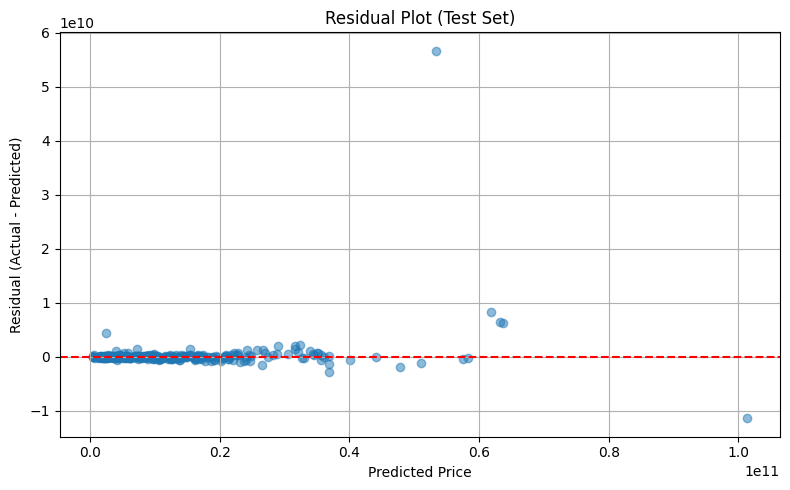

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assume y_true_test and y_pred_test are available from previous cell
residuals = y_true_test - y_pred_test

plt.figure(figsize=(8,5))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

اهمیت ویژگی‌ها:
price_per_sqm          0.732689
area                   0.186500
area_x_rooms           0.069754
area_bin_num           0.004194
floor                  0.002506
rooms                  0.001691
area_level_num         0.000681
district_code          0.000620
year_built             0.000609
building_age           0.000542
elevator_high_floor    0.000145
elevator               0.000039
warehouse              0.000030
parking                0.000000
dtype: float64


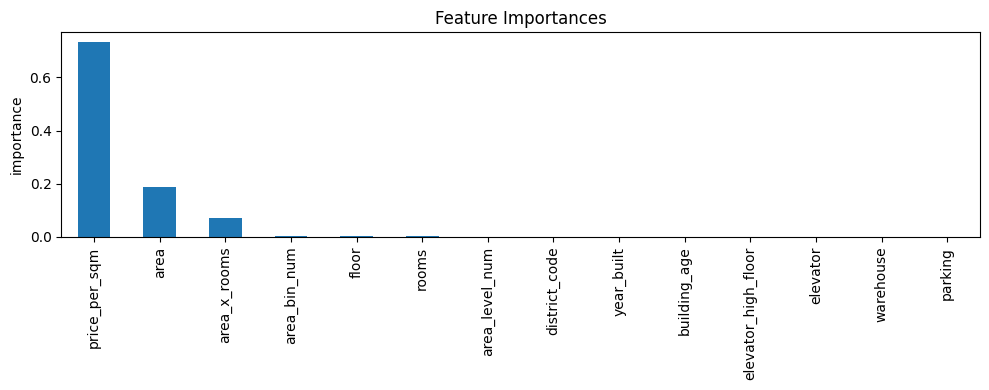

In [28]:
import pandas as pd

# فرض: rf مدل آموزش‌دیده و X_train دیتافریم ویژگی‌ها است
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("اهمیت ویژگی‌ها:")
print(importances)

# نمایش نموداری
importances.plot(kind='bar', figsize=(10,4), title='Feature Importances')
plt.ylabel('importance')
plt.tight_layout()
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("بهترین پارامترها:", grid.best_params_)
print("بهترین امتیاز (RMSE):", -grid.best_score_)

بهترین پارامترها: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
بهترین امتیاز (RMSE): 0.1545354834360098


In [30]:
from joblib import dump

# اگر می‌خواهید مدل GridSearch را ذخیره کنید از grid.best_estimator_ استفاده کنید
dump(rf, 'random_forest_final_model_log.joblib')
print('✅ مدل نهایی ذخیره شد: random_forest_final_model_log.joblib')

✅ مدل نهایی ذخیره شد: random_forest_final_model_log.joblib


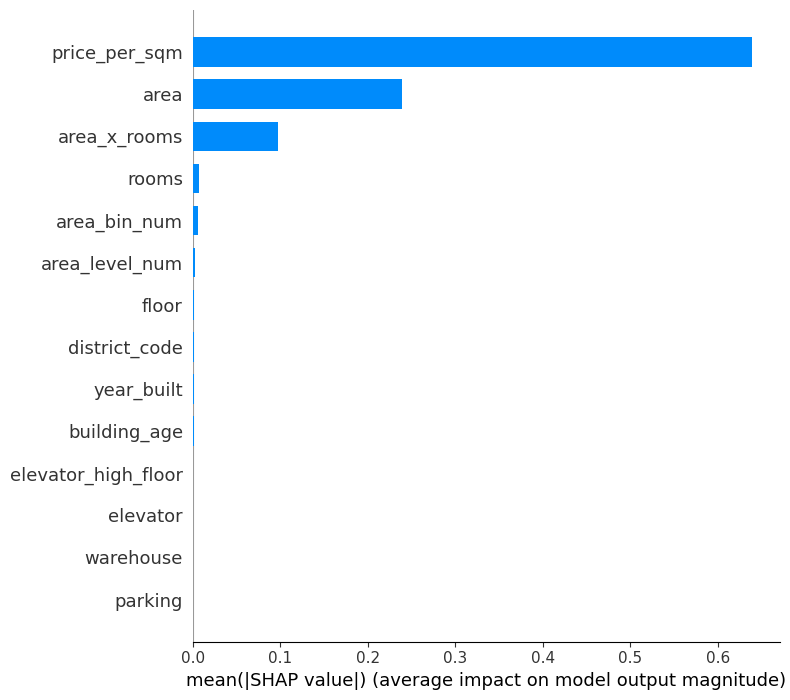

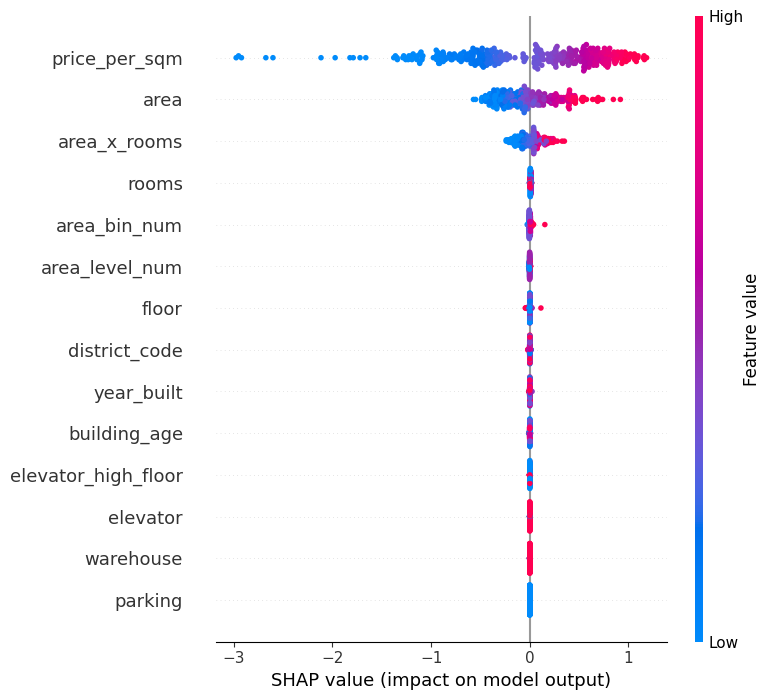

In [31]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# خلاصه‌ای از اهمیت ویژگی‌ها
shap.summary_plot(shap_values, X_test, plot_type="bar")

# نمودار خلاصه‌ای از تاثیر ویژگی‌ها روی پیش‌بینی
shap.summary_plot(shap_values, X_test)